Info b

https://sdss-marvin.readthedocs.io/en/latest/tools/image.html 

In [1]:
%matplotlib inline

In [8]:
import numpy as np
from astropy.io import fits
from marvin.tools import Maps
from tqdm import tqdm
import Bicone_Classifier
import multiprocessing as mp
import copy
import matplotlib.pyplot as plt
from marvin.utils.general.images import showImage
from marvin.tools.image import Image

from scipy import ndimage

In [5]:
HEADER_PATH = '/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']
petro_angle = hdu['NSA_ELPETRO_PHI']
sersic_angle = hdu['NSA_SERSIC_PHI']

In [6]:
def plot_major_axis(data):
    

    dapall_index = list(plateifu).index(data)
    p_slope = np.tan(petro_angle[dapall_index])
    s_slope = np.tan(sersic_angle[dapall_index])

    maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
    st_vel = maps.stellar_vel.value
    oiii_ew = maps.emline_gew_oiii_5008.value
    phi = maps.spx_ellcoo_elliptical_azimuth.value
    r_re = maps.spx_ellcoo_r_re.value
    
    axis_indicat = np.zeros(phi.shape)

    for i in range(phi.shape[0]):
        for j in range(phi.shape[1]):
            if phi[i][j] >= 88 and phi[i][j] <= 92:
                axis_indicat[i][j] = 1
            elif phi[i][j] >= 268 and phi[i][j] <= 272:
                axis_indicat[i][j] = 1
            elif r_re[i][j] >= 0.9 and r_re[i][j] <=1.1:
                axis_indicat[i][j] = 1
            else:
                pass
            
            
            
            
    plt.figure()
    plt.imshow(st_vel, cmap='viridis')
    plt.imshow(axis_indicat, 'Greys', alpha = 0.3)
    plt.title(r'$V_{stellar}$')
    plt.gca().invert_yaxis()
    plt.colorbar(orientation='vertical',label = r'$km/s$')
    plt.savefig(data+'.png')
    


In [7]:
def marvin_major_axis(data):
    
    dapall_index = list(plateifu).index(data)
    p_slope = np.tan(petro_angle[dapall_index])
    s_slope = np.tan(sersic_angle[dapall_index])

    maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
    st_vel = maps.stellar_vel
    #oiii_ew = maps.emline_gew_oiii_5008.value
    phi = maps.spx_ellcoo_elliptical_azimuth.value
    r_re = maps.spx_ellcoo_r_re.value

    axis_indicat = np.zeros(phi.shape)

    for i in range(phi.shape[0]):
        for j in range(phi.shape[1]):
            if phi[i][j] >= 88 and phi[i][j] <= 92:
                axis_indicat[i][j] = 1
            elif phi[i][j] >= 268 and phi[i][j] <= 272:
                axis_indicat[i][j] = 1
            elif r_re[i][j] >= 0.9 and r_re[i][j] <=1.1:
                axis_indicat[i][j] = 1
            else:
                pass


    st_vel.plot(snr_min = None)
    plt.imshow(axis_indicat, 'Greys', alpha = 0.3)
    plt.savefig(data+'.png')

## Multi-processing


if __name__ == '__main__':
    pool = mp.Pool(processes=4)

    pool.imap_unordered(marvin_major_axis, plateifu_2):
        results.append(result)
       
    print(results)

## Plotting

SAMPLE_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
hdul_2 = fits.open(SAMPLE_PATH)
hdu_2 = hdul_2[1].data
plateifu_2 = hdu_2['PLATEIFU']


for i in plateifu_2:
    marvin_major_axis(i)

# Ploting axis over image

In [3]:
def image_major_axis(data):

    dapall_index = list(plateifu).index(data)
    p_slope = np.tan(petro_angle[dapall_index])
    s_slope = np.tan(sersic_angle[dapall_index])

    maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
    st_vel = maps.stellar_vel
    #oiii_ew = maps.emline_gew_oiii_5008.value
    phi = maps.spx_ellcoo_elliptical_azimuth.value
    r_re = maps.spx_ellcoo_r_re.value

    axis_indicat = np.zeros(phi.shape)

    for i in range(phi.shape[0]):
        for j in range(phi.shape[1]):
            if phi[i][j] >= 88 and phi[i][j] <= 92:
                axis_indicat[i][j] = 100
            elif phi[i][j] >= 268 and phi[i][j] <= 272:
                axis_indicat[i][j] = 100
            elif r_re[i][j] >= 0.9 and r_re[i][j] <=1.1:
                axis_indicat[i][j] = 100
            else:
                pass
            
    im = Image(data)

    spaxel_len = 281*2
    factor = spaxel_len / axis_indicat.shape[0]

    large_mask = ndimage.zoom(axis_indicat, factor, order=0)
    # large_mask[large_mask > 0] = 1


    mask = np.flipud(large_mask)
    im = showImage(plateifu = data)
    masked = np.ma.masked_where(mask == 0, mask)

    plt.imshow(im, interpolation='none')
    plt.imshow(masked, 'autumn', interpolation='none', alpha=0.7)
    plt.savefig(data+'_image.png')

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_training_set.fits' mode='rb' closefd=True> (ResourceWarning)
[WARNING]: showImage is deprecated as of Marvin 2.3.0. Please use marvin.tools.image.Image instead. (MarvinDeprecationWarning)
[WARNING]: subprocess 16207 is still running (ResourceWarning)
[WARNING]: subprocess 16214 is still running (ResourceWarning)
[WARNING]: subprocess 16220 is still running (ResourceWarning)
[WARNING]: subprocess 16225 is still running (ResourceWarning)
[WARNING]: subprocess 16235 is still running (ResourceWarning)
[WARNING]: subprocess 16241 is still running (ResourceWarning)
[WARNING]: subprocess 16246 is still running (ResourceWarning)
[WARNING]: subprocess 16259 is still running (ResourceWarning)
[WARNING]: subprocess 16265 is still running (ResourceWarning)
[WARNING]: subprocess 16272 is still running (ResourceWarning)
[WARNING]: subprocess 16278 is still running (ResourceWarning)
[WARNING]: subprocess 16284 is still run

[WARNING]: subprocess 16771 is still running (ResourceWarning)
[WARNING]: subprocess 16777 is still running (ResourceWarning)
[WARNING]: subprocess 16783 is still running (ResourceWarning)
[WARNING]: subprocess 16789 is still running (ResourceWarning)
[WARNING]: subprocess 16795 is still running (ResourceWarning)
[WARNING]: subprocess 16802 is still running (ResourceWarning)
[WARNING]: subprocess 16807 is still running (ResourceWarning)
[WARNING]: subprocess 16813 is still running (ResourceWarning)
[WARNING]: subprocess 16820 is still running (ResourceWarning)
[WARNING]: subprocess 16827 is still running (ResourceWarning)
[WARNING]: subprocess 16833 is still running (ResourceWarning)
[WARNING]: subprocess 16840 is still running (ResourceWarning)
[WARNING]: subprocess 16845 is still running (ResourceWarning)
[WARNING]: subprocess 16851 is still running (ResourceWarning)
[WARNING]: subprocess 16857 is still running (ResourceWarning)
[WARNING]: subprocess 16863 is still running (ResourceW

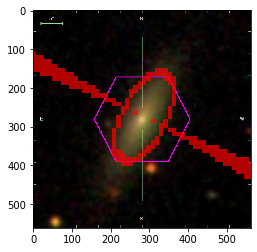

In [9]:
## Plotting

SAMPLE_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
hdul_2 = fits.open(SAMPLE_PATH)
hdu_2 = hdul_2[1].data
plateifu_2 = hdu_2['PLATEIFU']


for i in plateifu_2:
    image_major_axis(i)

In [ ]:
data = '8320-1901'

dapall_index = list(plateifu).index(data)
p_slope = np.tan(petro_angle[dapall_index])
s_slope = np.tan(sersic_angle[dapall_index])

maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
st_vel = maps.stellar_vel
#oiii_ew = maps.emline_gew_oiii_5008.value
phi = maps.spx_ellcoo_elliptical_azimuth.value
r_re = maps.spx_ellcoo_r_re.value

axis_indicat = np.zeros(phi.shape)

for i in range(phi.shape[0]):
    for j in range(phi.shape[1]):
        if phi[i][j] >= 88 and phi[i][j] <= 92:
            axis_indicat[i][j] = 100
        elif phi[i][j] >= 268 and phi[i][j] <= 272:
            axis_indicat[i][j] = 100
        elif r_re[i][j] >= 0.9 and r_re[i][j] <=1.1:
            axis_indicat[i][j] = 100
        else:
            pass




In [ ]:
#im = Image(data)

spaxel_len = 281*2
factor = spaxel_len / axis_indicat.shape[0]

large_mask = ndimage.zoom(axis_indicat, factor, order=0)
#large_mask[large_mask > 0] = 1


mask = np.flipud(large_mask)
im = showImage(plateifu = data)
masked = np.ma.masked_where(mask == 0, mask)

plt.imshow(im, interpolation='none')
plt.imshow(masked, 'autumn', interpolation='none', alpha=0.7)
#plt.savefig(data+'_image.png')
plt.show()